* [1.Description des données](#dd)
* [2.Nettoyage](#ne)
* [3.Choix des variables cibles (les émissions de CO2 et  la consommation totale d’énergie)](#cv)
* [4.Analyse exploratoire](#ae)
* [5.Sauvegarde des données dans un fichier csv](#cs)

In [2]:
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt 
import folium
from folium import plugins
warnings.filterwarnings('ignore')

# 1.Description des données <a class="anchor" id="dd"></a>

In [3]:
df=pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [4]:
df.shape

(3376, 46)

In [5]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [6]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [7]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [8]:
#batiments non destinés à l'habitation
df = df[~df['BuildingType'].str.contains("Multifamily")]
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

<AxesSubplot:>

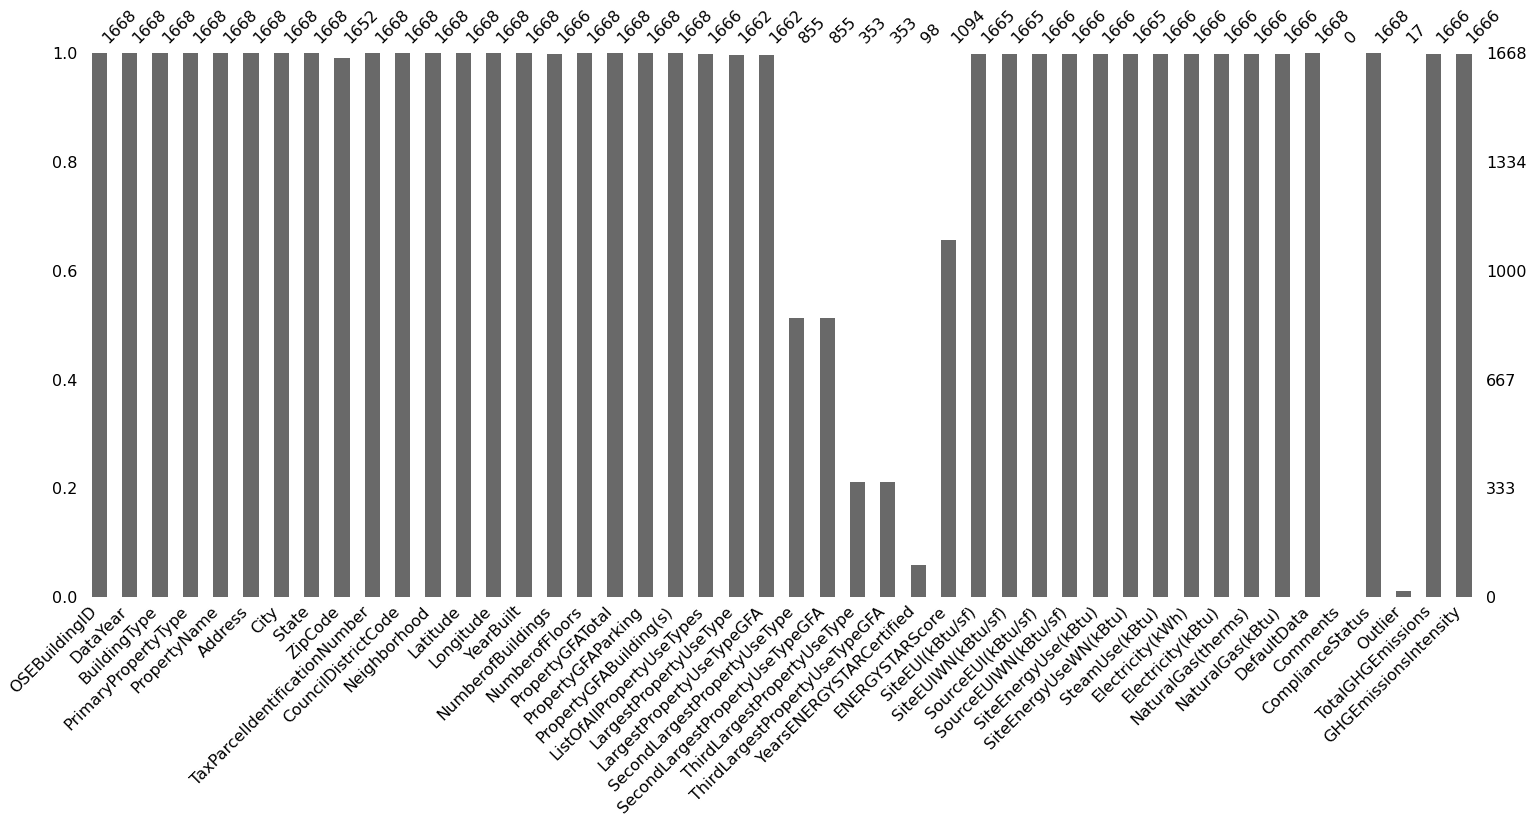

In [9]:
msno.bar(df)

# 2.Nettoyage<a class="anchor" id="ne"></a>

In [10]:
df.shape

(1668, 46)

In [11]:
#supprimer les lignes avec TotalGHGEmissions<0
df = df[df['TotalGHGEmissions'] >= 0]

In [12]:
# remplir les nan des variables signalés par la valeur la plus fréquente
df[['LargestPropertyUseType',           
'LargestPropertyUseTypeGFA',          
'SecondLargestPropertyUseType',       
'SecondLargestPropertyUseTypeGFA',    
'ThirdLargestPropertyUseType',        
'ThirdLargestPropertyUseTypeGFA',   
'YearsENERGYSTARCertified', 
'SiteEUI(kBtu/sf)',                   
'SiteEUIWN(kBtu/sf)',           
'ENERGYSTARScore',    
'SiteEnergyUseWN(kBtu)','Outlier',]]=df[['LargestPropertyUseType',           
'LargestPropertyUseTypeGFA',          
'SecondLargestPropertyUseType',       
'SecondLargestPropertyUseTypeGFA',    
'ThirdLargestPropertyUseType',        
'ThirdLargestPropertyUseTypeGFA',   
'YearsENERGYSTARCertified',
'SiteEUI(kBtu/sf)',                   
'SiteEUIWN(kBtu/sf)', 
'ENERGYSTARScore',    
'SiteEnergyUseWN(kBtu)','Outlier']].fillna(df.mode().iloc[0])

<AxesSubplot:>

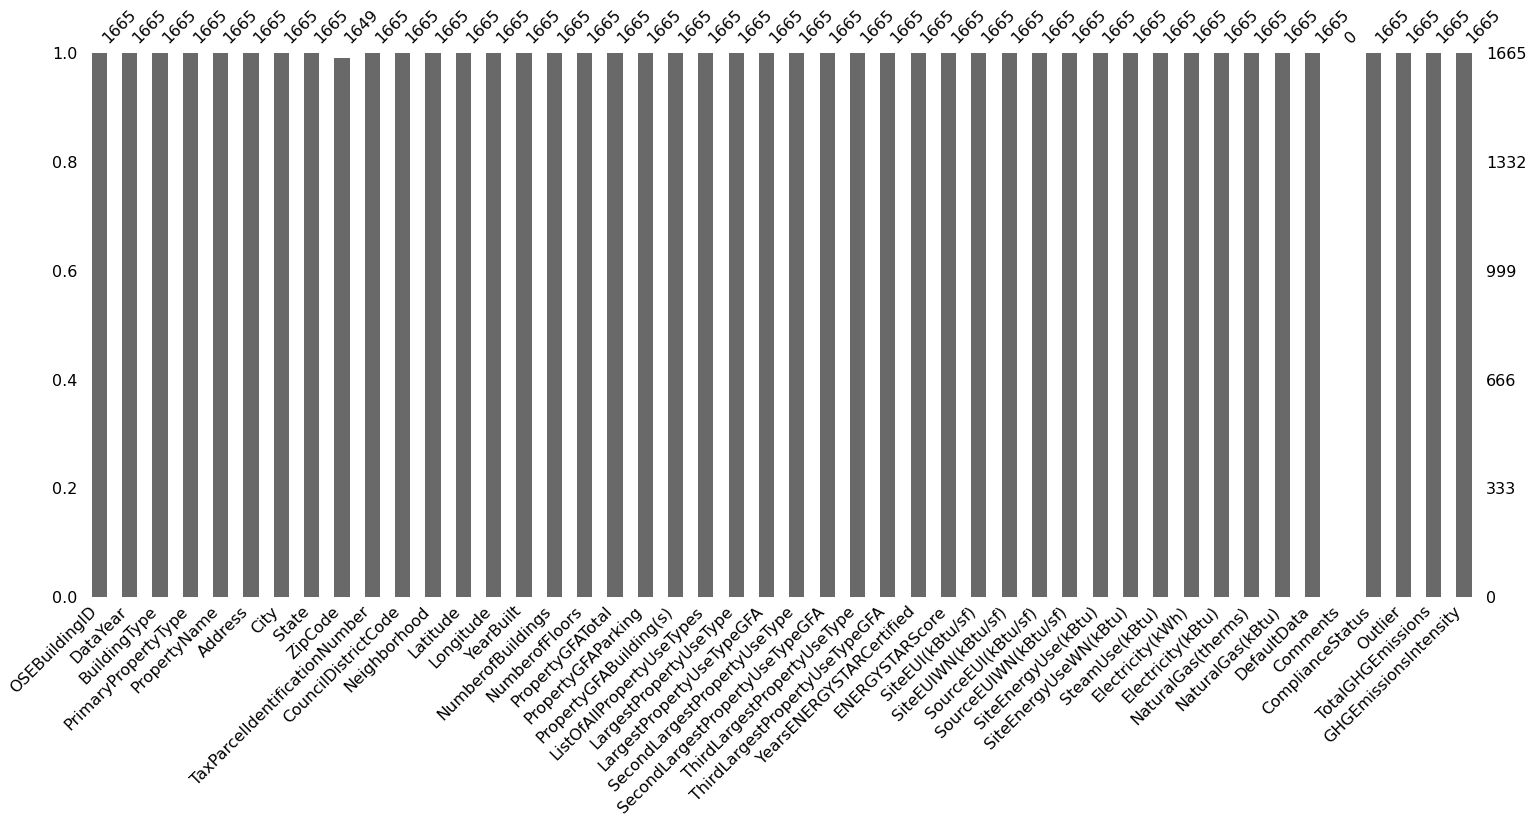

In [13]:
msno.bar(df)

# 3.Choix des variables cibles (les émissions de CO2 et  la consommation totale d’énergie)<a class="anchor" id="cv"></a>

In [15]:
#'GHGEmissionsIntensity',TotalGHGEmissions
#'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)'
#SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf)

# 4.Analyse exploratoire <a class="anchor" id="ae"></a>

In [16]:
DataYear=df['DataYear']

### Analyse univariée

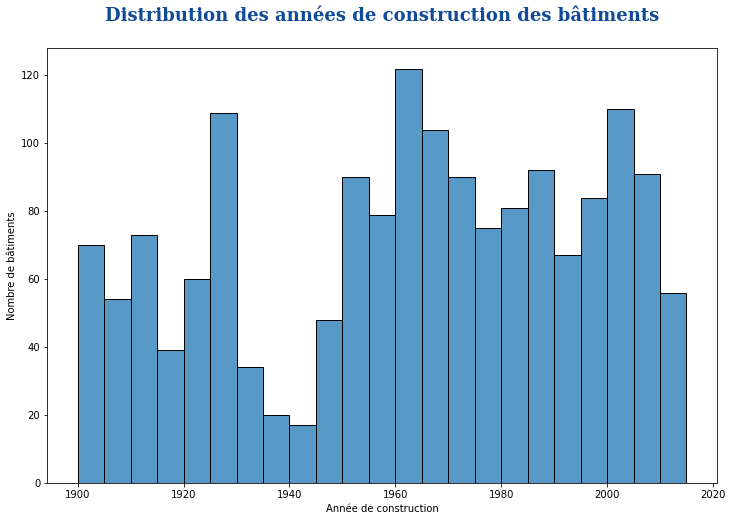

In [20]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='YearBuilt', bins=int((df.YearBuilt.max() - df.YearBuilt.min())/5))
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n", fontdict=font_title)
plt.show()

**Observations**
<br>
La plupart des batiments sont construits après 1950

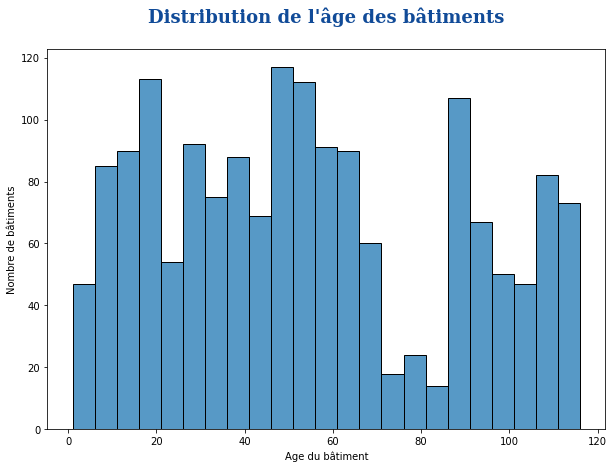

In [21]:
#Ajout de la variable age 
df['BuildingAge'] = DataYear - df['YearBuilt']
# df.drop('YearBuilt', axis=1, inplace=True)

fig = plt.figure(figsize=(10,7))
ax = sns.histplot(data=df, x='BuildingAge', bins=int((df.BuildingAge.max() - df.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n", fontdict=font_title)
plt.show()

**Observations**
<br>
La plupart des batimentssont agés moins de 70 ans.

In [22]:
list(df.columns)

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'Comments',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'Building

In [23]:
 #les variables categorielles
catCols = [col for col in df.columns if df[col].dtype=="O"]
print(catCols)

['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address', 'City', 'State', 'TaxParcelIdentificationNumber', 'Neighborhood', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'YearsENERGYSTARCertified', 'ComplianceStatus', 'Outlier']


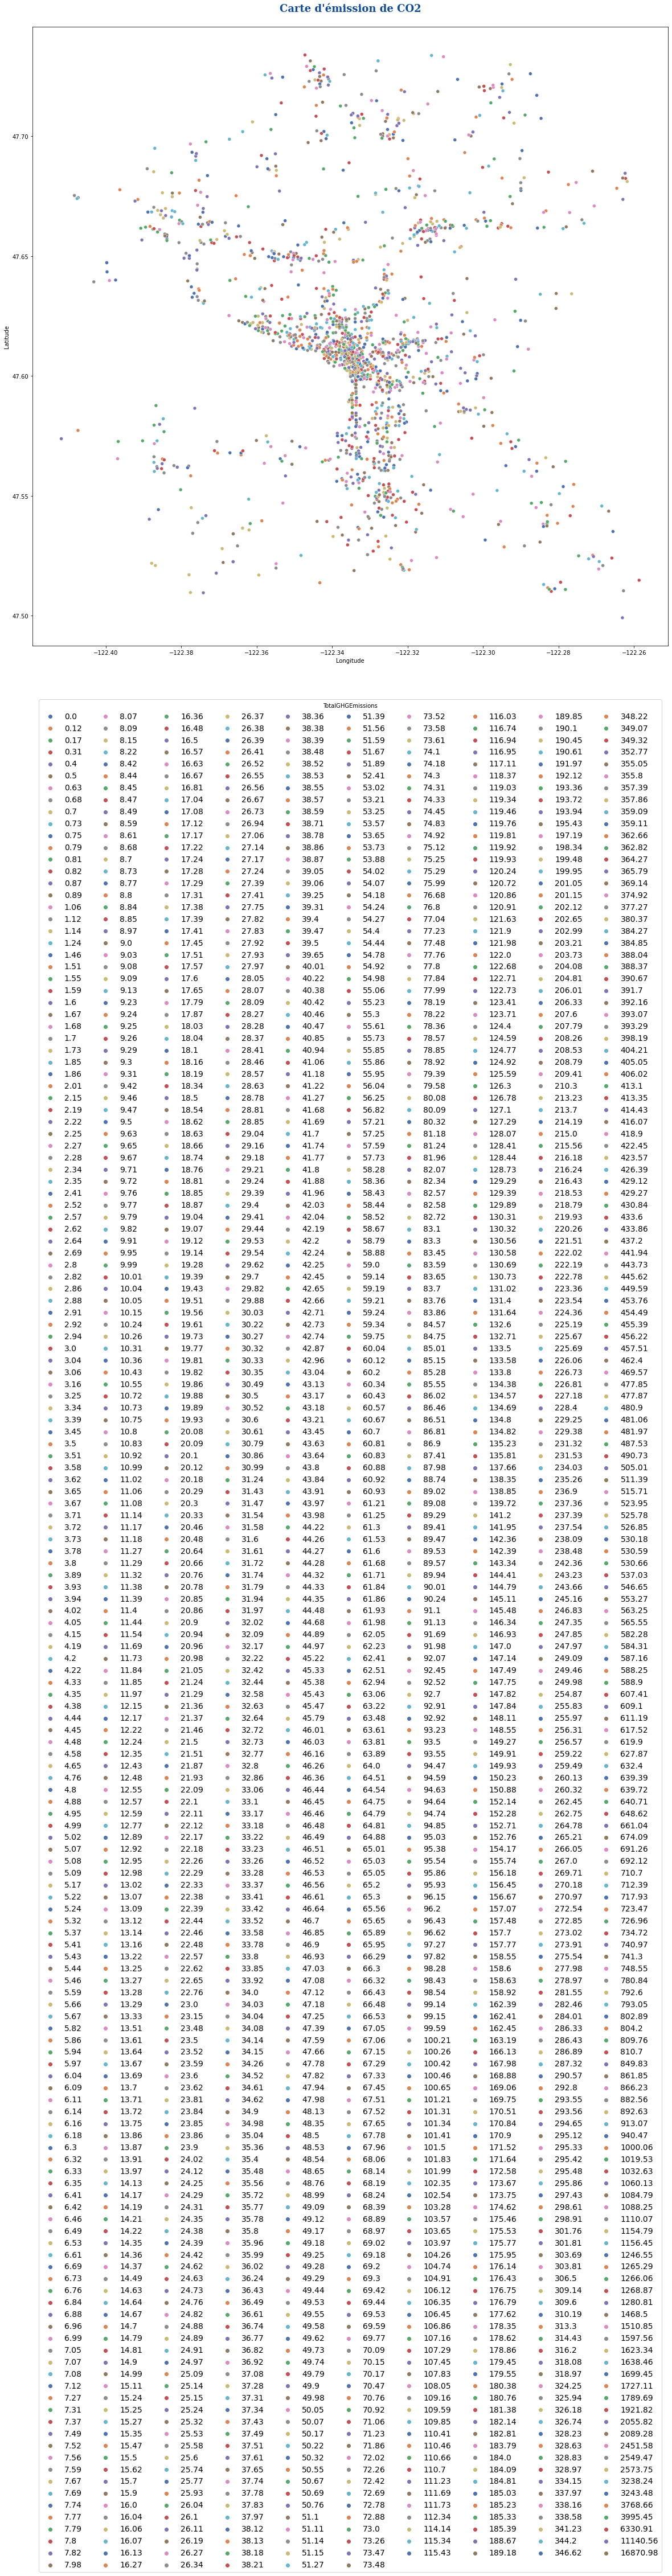

In [100]:

fig = plt.gcf()
fig.set_size_inches( 20, 20)
plt.title(f"Carte d'émission de CO2\n",fontdict=font_title)
g =sns.scatterplot(x='Longitude',y='Latitude',
              hue='TotalGHGEmissions',
              palette="deep",
              legend='brief',
              data=df)

#place legend in center right of plot
plt.legend(loc='upper center', title='TotalGHGEmissions',prop={'size':13.89}, 
           bbox_to_anchor=(0.5, -0.08), ncol=10)

            

**Observations**
<br>

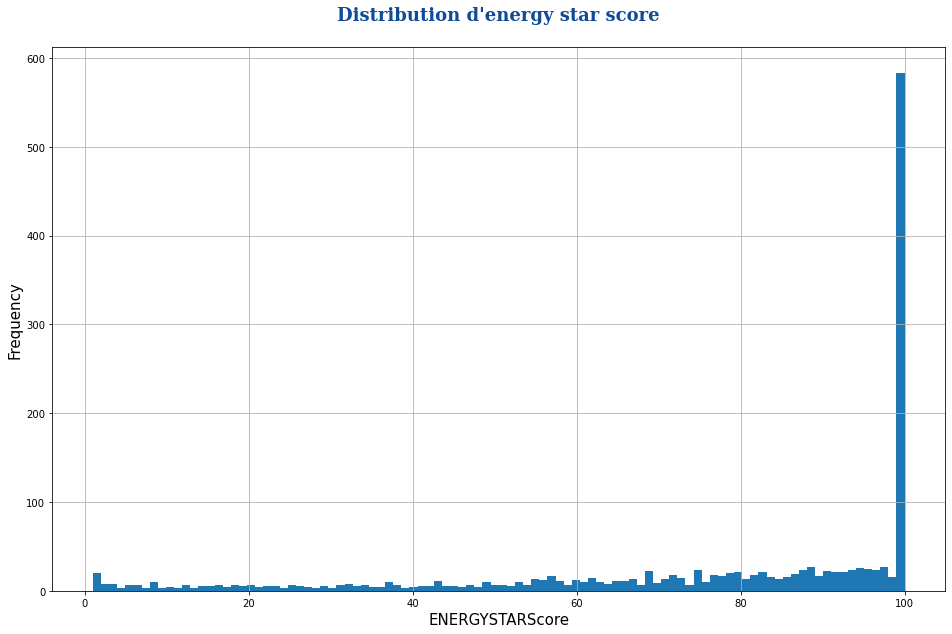

In [105]:
df['ENERGYSTARScore'].hist(bins=100)
plt.xlabel("ENERGYSTARScore", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.title(f"Distribution d'energy star score\n",fontdict=font_title)
fig = plt.gcf()
fig.set_size_inches( 16, 10)

### Les outliers

In [62]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

**Remarque**
<br>
'BuildingType':Number of buildings included in the property's report. In cases where a property is reporting as a campus, multiple buildings may be included in one report.

In [61]:
df[(df['BuildingType']!='Campus') & (df['NumberofBuildings']>1)][['BuildingType','NumberofBuildings']]


,BuildingType,NumberofBuildings
36,NonResidential,3.0
80,NonResidential,2.0
98,NonResidential,4.0
117,NonResidential,3.0
124,NonResidential,6.0
167,NonResidential,6.0
170,NonResidential,9.0
319,NonResidential,2.0
353,NonResidential,2.0
364,NonResidential,6.0


In [67]:
#suppression des lignes avec 'BuildingType']!='Campus' et 'NumberofBuildings'>1
#find the OSEBuildingID that doesn't match the condition and filter the original DataFrame by them
ids = df.loc[(df.BuildingType != 'Campus') & (df.NumberofBuildings >1)].OSEBuildingID

df = df[~df.OSEBuildingID.isin(ids)]

In [68]:
df[(df['BuildingType']!='Campus') & (df['NumberofBuildings']>1)][['BuildingType','NumberofBuildings']]


,BuildingType,NumberofBuildings


In [69]:
df['ComplianceStatus'].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

**Note**
<br>
Penser à supprimer les lignes avec ComplianceStatus égal à 'Error - Correct Default Data'

### Analyse bivariée

[None]

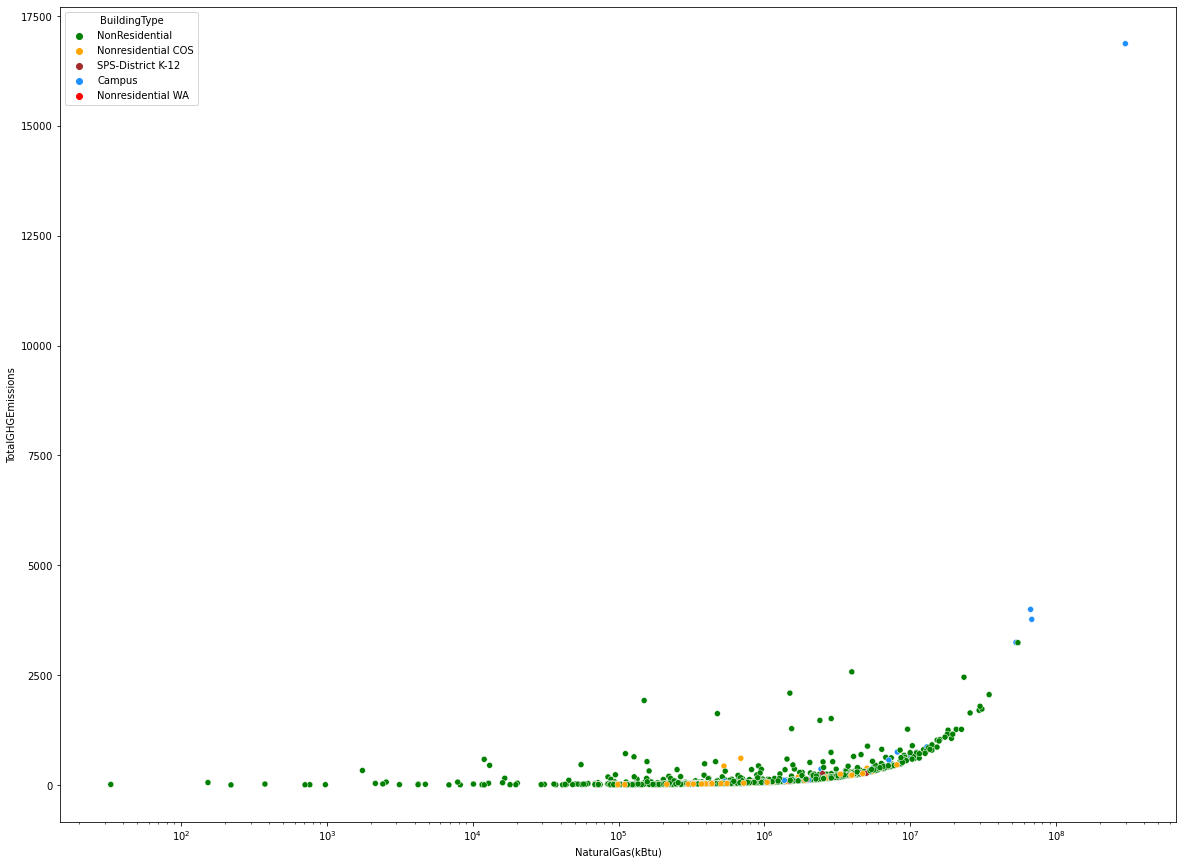

In [99]:
fig = plt.gcf()
fig.set_size_inches( 20, 15)
g =sns.scatterplot(x="NaturalGas(kBtu)", y="TotalGHGEmissions", hue="BuildingType",
              data=df, 
                    palette=['green','orange','brown','dodgerblue','red'], legend='full')
g.set(xscale="log")

[None]

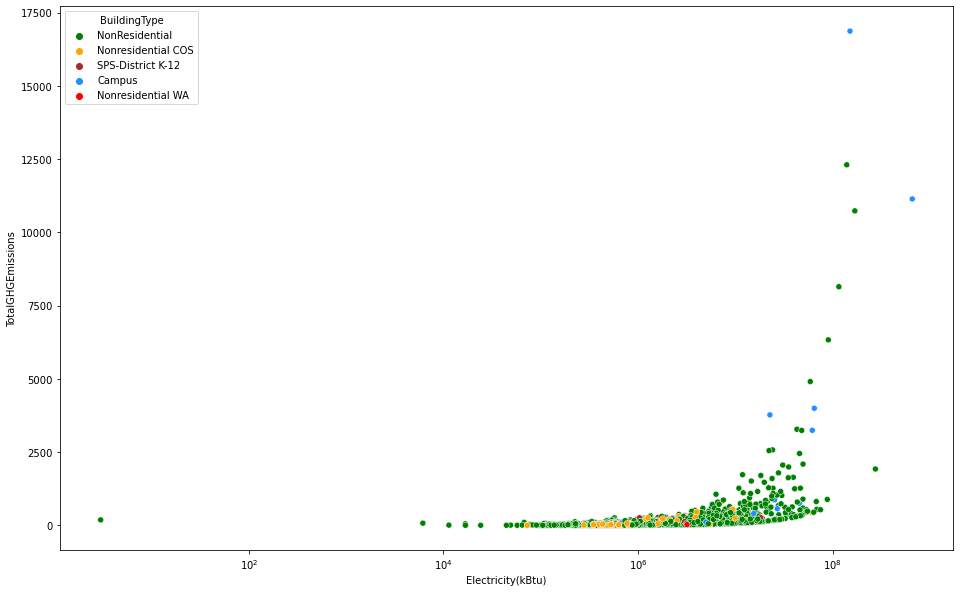

In [34]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
g =sns.scatterplot(x="Electricity(kBtu)", y="TotalGHGEmissions", hue="BuildingType",
              data=df, 
                    palette=['green','orange','brown','dodgerblue','red'], legend='full')
g.set(xscale="log")

[None]

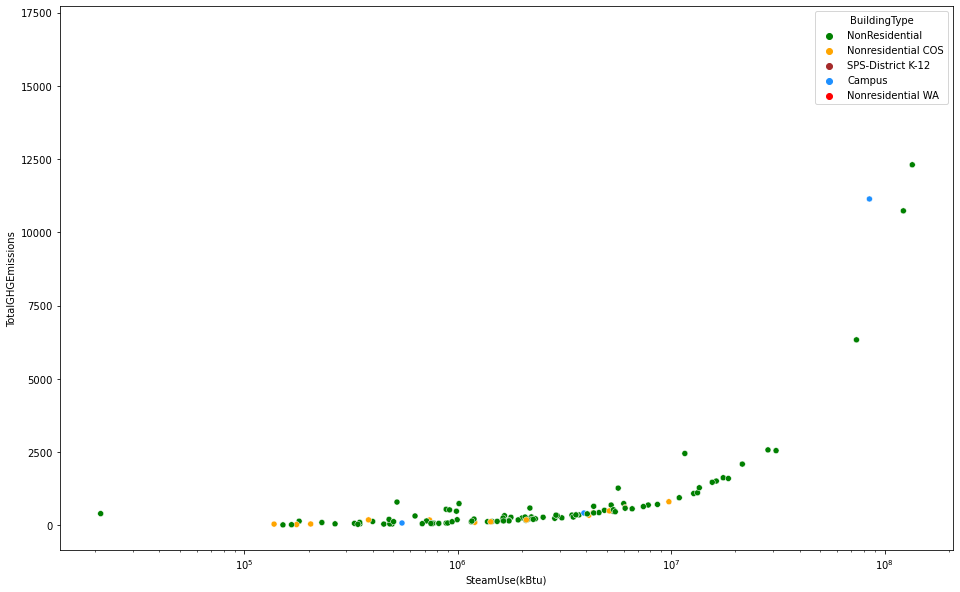

In [35]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
g =sns.scatterplot(x="SteamUse(kBtu)", y="TotalGHGEmissions", hue="BuildingType",
              data=df, 
                    palette=['green','orange','brown','dodgerblue','red'], legend='full')
g.set(xscale="log")

[None]

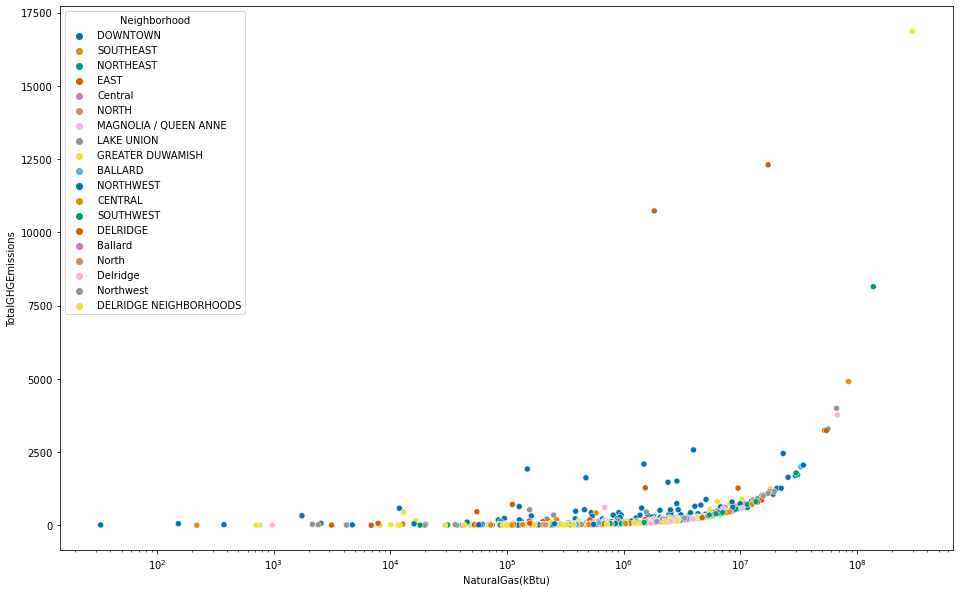

In [38]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
g =sns.scatterplot(x="NaturalGas(kBtu)", y="TotalGHGEmissions", hue="Neighborhood",
              data=df, 
                    palette='colorblind', legend='full')
g.set(xscale="log")

[None]

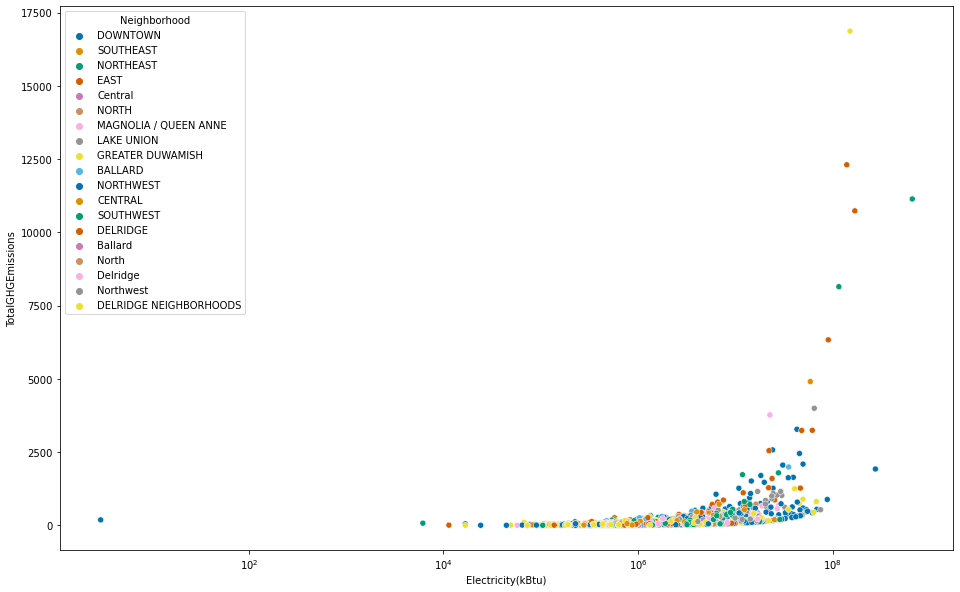

In [39]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
g =sns.scatterplot(x="Electricity(kBtu)", y="TotalGHGEmissions", hue="Neighborhood",
              data=df, 
                    palette='colorblind', legend='full')
g.set(xscale="log")

[None]

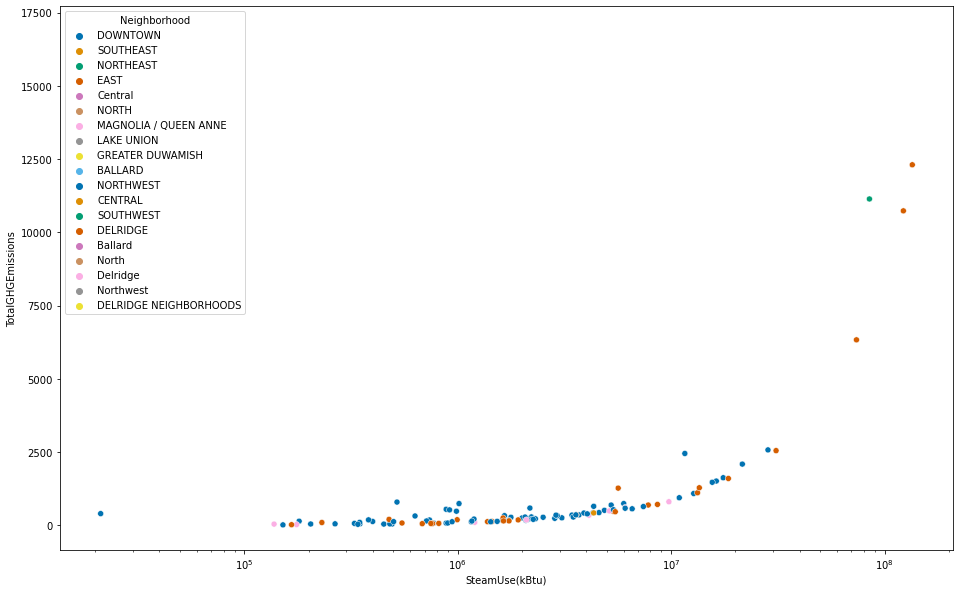

In [41]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
g =sns.scatterplot(x="SteamUse(kBtu)", y="TotalGHGEmissions", hue="Neighborhood",
              data=df, 
                    palette='colorblind', legend='full')
g.set(xscale="log")

In [37]:
df['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'Central', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [44]:
df[['OSEBuildingID', 'BuildingType', 
     'ListOfAllPropertyUseTypes',
    'PrimaryPropertyType',
       'LargestPropertyUseType', 
       'SecondLargestPropertyUseType', 
       'ThirdLargestPropertyUseType']]

,OSEBuildingID,BuildingType,ListOfAllPropertyUseTypes,PrimaryPropertyType,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
0,1,NonResidential,Hotel,Hotel,Hotel,Parking,Office
1,2,NonResidential,"Hotel, Parking, Restaurant",Hotel,Hotel,Parking,Restaurant
2,3,NonResidential,Hotel,Hotel,Hotel,Parking,Office
3,5,NonResidential,Hotel,Hotel,Hotel,Parking,Office
4,8,NonResidential,"Hotel, Parking, Swimming Pool",Hotel,Hotel,Parking,Swimming Pool
...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,Office,Office,Parking,Office
3372,50223,Nonresidential COS,Other - Recreation,Other,Other - Recreation,Parking,Office
3373,50224,Nonresidential COS,"Fitness Center/Health Club/Gym, Other - Recrea...",Other,Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool
3374,50225,Nonresidential COS,"Fitness Center/Health Club/Gym, Food Service, ...",Mixed Use Property,Other - Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare


In [29]:
#df1=df[['Longitude','Latitude','TotalGHGEmissions']]
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [51]:
#df[['BuildingType','NumberofBuildings']]


array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'Other - Mall',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Multifamily Housing',
       'Worship Facility', 'Restaurant', 'Data Center', 'Laboratory',
       'Supermarket/Grocery Store', 'Convention Center',
       'Urgent Care/Clinic/Other Outpatient', 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Indu

### Analyse multivariée

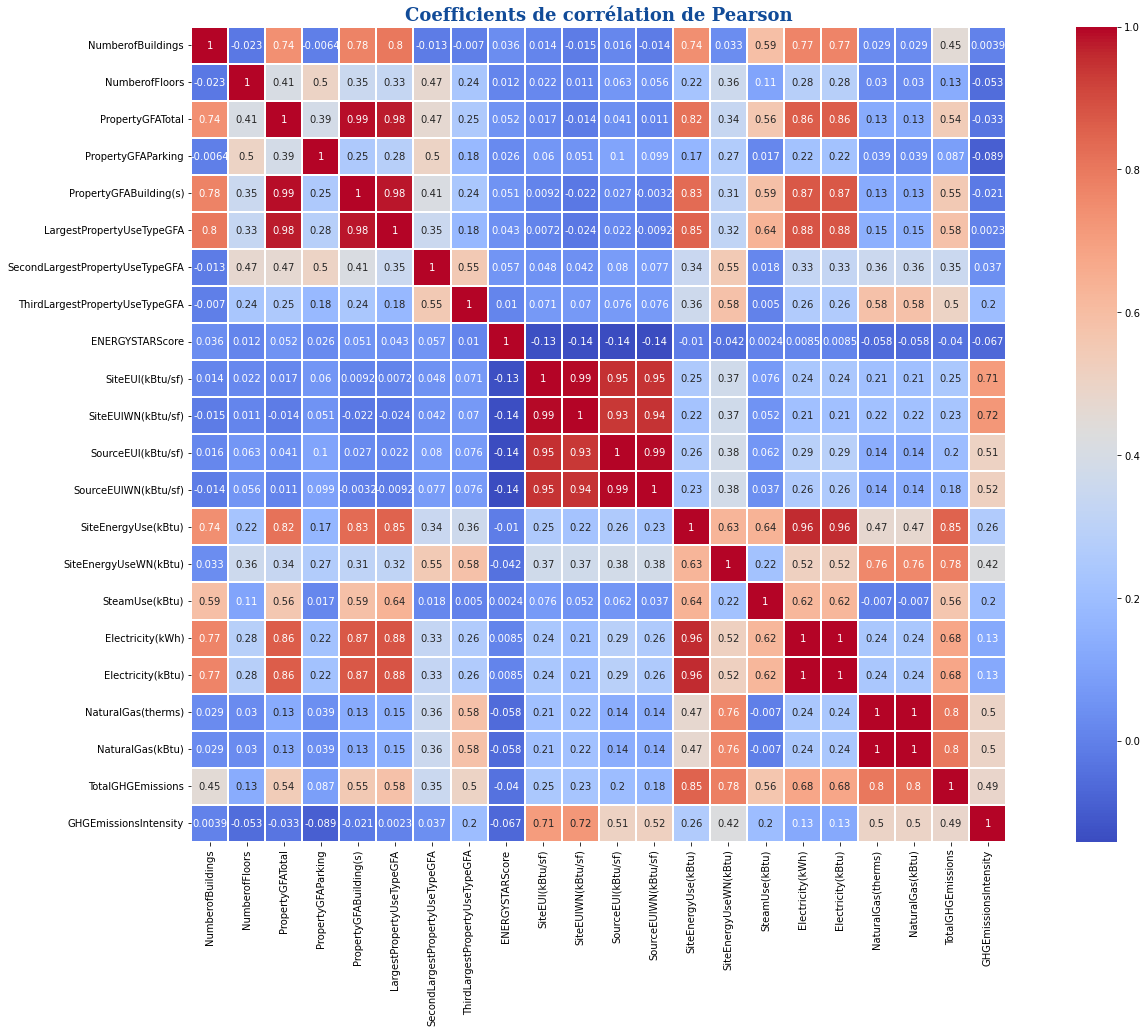

In [106]:
#look for correlated variables
fig=plt.figure(figsize=(25,15))
font_title = {'family': 'serif',
             'color':  '#114b98',
             'weight': 'bold',
            'size': 18,
            }

corr_mat = df[['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 
              'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 
               'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 
               'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 
               'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity']].corr()
sns.heatmap(corr_mat, square=True, linewidths=0.01, annot=True, cmap='coolwarm')
plt.title("Coefficients de corrélation de Pearson", fontdict=font_title)
plt.show()

### Regroupement des classes

In [72]:
df['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Other - Mall', 'Senior Care Community', 'Medical Office',
       'Retail Store', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Non-Refrigerated Warehouse', 'Distribution Center', 'Parking',
       'Multifamily Housing', 'Worship Facility', 'Restaurant',
       'Data Center', 'Laboratory', 'Supermarket/Grocery Store',
       'Convention Center', 'Urgent Care/Clinic/Other Outpatient',
       'Hospital (General Medical & Surgical)', 'Other - Services',
       'Wholesale Club/Supercenter', 'Refrigerated Warehouse',
       'Strip Mall', 'Other - Recreation

# 5.Sauvegarde des données dans un fichier csv<a class="anchor" id="cs"></a>

In [131]:
#sauvegarde des données cleanées
df.to_csv('prepared_data.csv', sep='\t',index=False)